<a href="https://colab.research.google.com/github/tatv047/Data-Science/blob/main/Basic_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link to lesson: https://www.kaggle.com/code/hamelg/python-for-data-21-descriptive-statistics/notebook

# Descriptive Statistics

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis. We've already seen several examples of deceptive statistics in earlier lessons, such as means and medians. In this lesson, we'll review some of these functions and explore several new ones.

## Measure of Center

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

The **mean** is simply an average:
the sum of the values divided by the total number of records. As we've seen in previous lessons we can use df.mean() to get the mean of each column in a DataFrame:



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
mtcars = pd.read_csv("/content/sample_data/mtcars.csv")
mtcars = mtcars.rename(columns={'Unnamed: 0': 'model'})
mtcars.set_index('model', inplace=True)
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
mtcars.mean() # Get the mean of each column

,0
mpg,20.090625
cyl,6.187500
disp,230.721875
hp,146.687500
drat,3.596563
wt,3.217250
qsec,17.848750
vs,0.437500
am,0.406250
gear,3.687500


We can also get the means of each row by supplying an axis argument:

In [10]:
mtcars.mean(axis = 1)

,0
model,
Mazda RX4,29.907273
Mazda RX4 Wag,29.981364
Datsun 710,23.598182
Hornet 4 Drive,38.739545
Hornet Sportabout,53.664545
Valiant,35.049091
Duster 360,59.720000
Merc 240D,24.634545
Merc 230,27.233636


The **median** of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the **50% percentile** since 50% of the observations are found below it. As we've seen previously, you can get the median using the df.median() function:

In [11]:
mtcars.median()

,0
mpg,19.200
cyl,6.000
disp,196.300
hp,123.000
drat,3.695
wt,3.325
qsec,17.710
vs,0.000
am,0.000
gear,4.000


Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean.
 **In a symmetric distribution, the mean and median will be the same.** Let's investigate with a density plot:

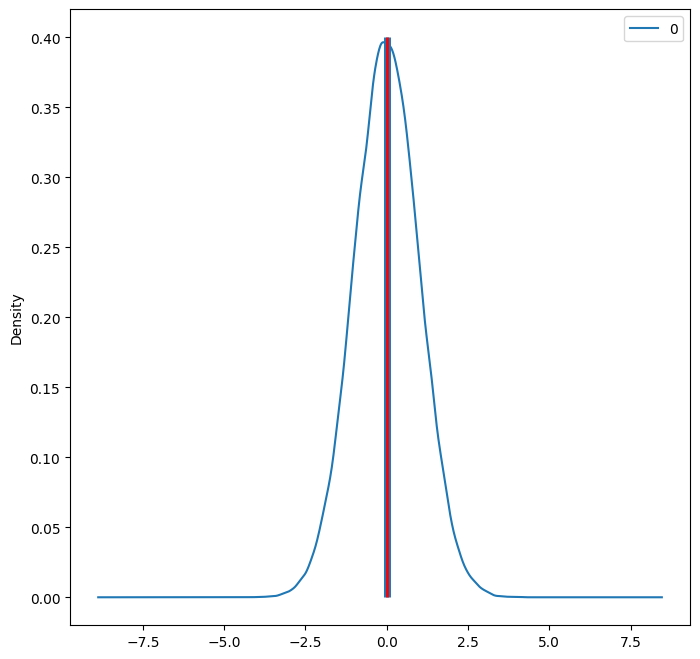

In [12]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind='density',
               figsize = (8,8));

plt.vlines(norm_data.mean(),  # plot black line at mean
           ymin = 0,
           ymax = 0.4,
           linewidth = 5.0);

plt.vlines(norm_data.median(),  # plot red line at median
           ymin = 0,
           ymax = 0.4,
           linewidth = 2.0,
           color = 'red');

In the plot above the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:

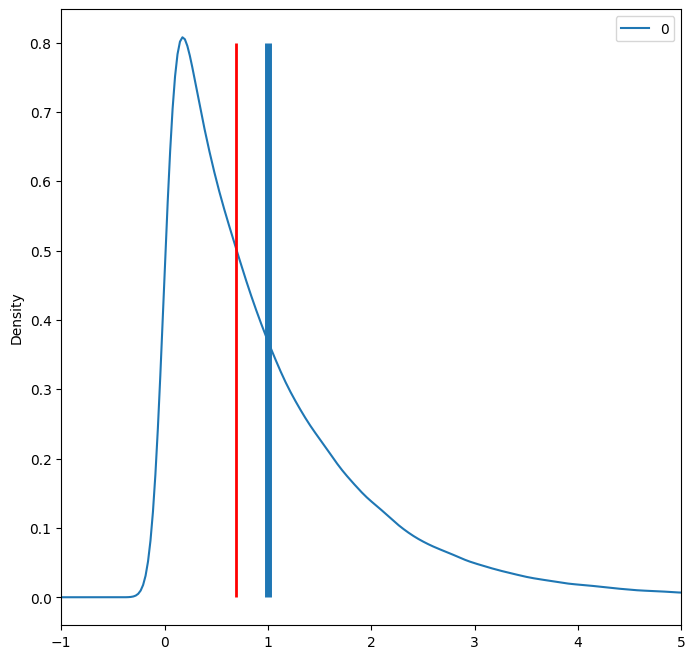

In [13]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind='density',
                 figsize = (8,8),
                 xlim= (-1,5));

plt.vlines(skewed_data.mean(),  # plot black line at mean
           ymin = 0,
           ymax = 0.8,
           linewidth = 5.0);

plt.vlines(skewed_data.median(),  # plot red line at median
           ymin = 0,
           ymax = 0.8,
           linewidth = 2.0,
           color = 'red');

The mean is also influenced heavily by outliers, while the median resists the influence of outliers:

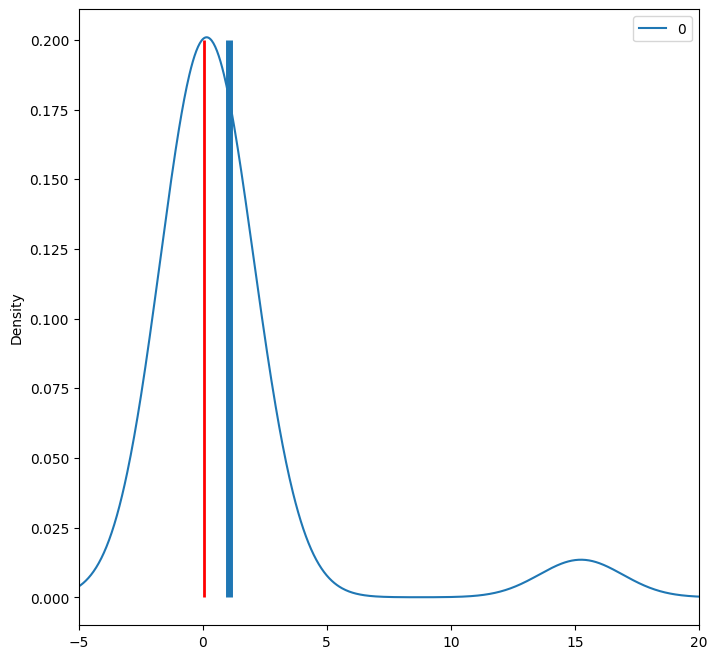

In [14]:
norm_data = np.random.normal(size = 50)
outliers = np.random.normal(15, size = 3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers),
                                            axis = 0))

combined_data.plot(kind = "density",
                   figsize = (8,8),
                   xlim = (-5,20));

plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0,
           ymax=0.2,
           linewidth=5.0);

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0,
           ymax=0.2,
           linewidth=2.0,
           color="red");

Since the median tends to resist the effects of skewness and outliers, it is known a "**robust**" statistic.
The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

The **mode** of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. Find the mode with df.mode():

In [15]:
mtcars.mode()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You are seeing multiple rows here, this is because few rows have multiple modes i.e. values with same number of counts. If a column has only one mode,other values are returned as NaN.

## Measure of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range.
**Range** is the distance between the maximum and minimum observations:

In [16]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract:
- **the minimum value (0th percentile)**
- **first quartile (25th percentile)**
- **median**
- **third quartile(75th percentile**)
- **maximum value (100th percentile)** using the quantile() function:

In [17]:
five_num = [mtcars["mpg"].quantile(0),
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.5),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

Since these values are so commonly used to describe data, they are known as the "**five number summary**". They are the same percentile values returned by df.describe():

In [18]:
mtcars["mpg"].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [19]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

The boxplots we learned to create in the lesson on plotting are just visual representations of the five number summary and IQR:

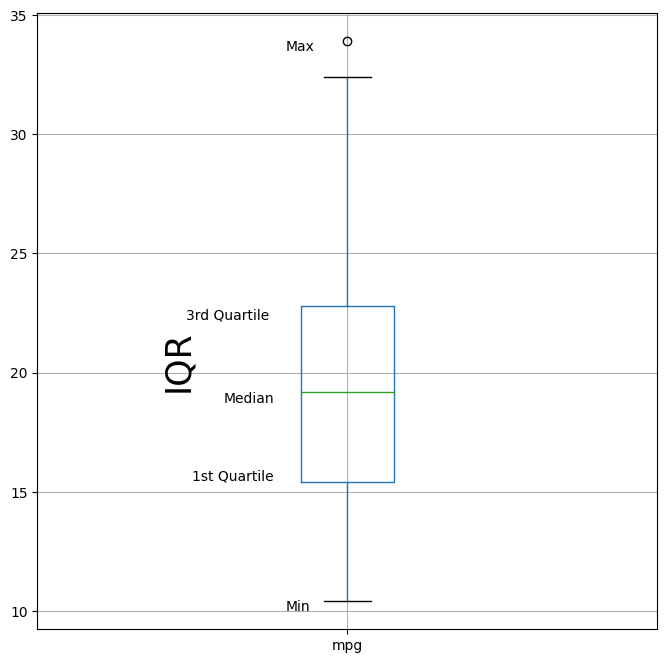

In [20]:
mtcars.boxplot(column = "mpg",
               return_type = "axes",
               figsize = (8,8));

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25);

Variance and standard deviation are two other common measures of spread. The **variance** of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [21]:
mtcars["mpg"].var()

36.32410282258064

The **standard deviation** is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [22]:
mtcars["mpg"].std()

6.026948052089104

**NOTE:**

- Since variance and standard deviation are derived from the mean, they are susceptible to data skew and outliers.
- **Median absolute deviation** is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [23]:
abs_median_deviations = abs(mtcars["mpg"] - mtcars["mpg"].median())
abs_median_deviations.median()*1.4826

# The MAD is often multiplied by a scaling factor of 1.4826.


5.411490000000001

## Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution v.s. the center. We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:



In [24]:
mtcars["mpg"].skew()

0.6723771376290805

In [25]:
mtcars["mpg"].kurt()

-0.0220062914240855

To explore these two measures further, let's create some dummy data and inspect it:



In [26]:
norm_data = np.random.normal(size = 100000)
skewed_data = np.concatenate((np.random.normal(size = 35000) + 2,
                              np.random.exponential(size = 65000)),
                             axis = 0)
uniform_data = np.random.uniform(0, 2, size = 100000)
peaked_data = np.concatenate((np.random.exponential(size = 50000),
                              np.random.exponential(size = 50000) * (-1)),
                             axis = 0)

data_df = pd.DataFrame({"norm" : norm_data,
                        "skewed" : skewed_data,
                        "uniform" : uniform_data,
                        "peaked" : peaked_data})


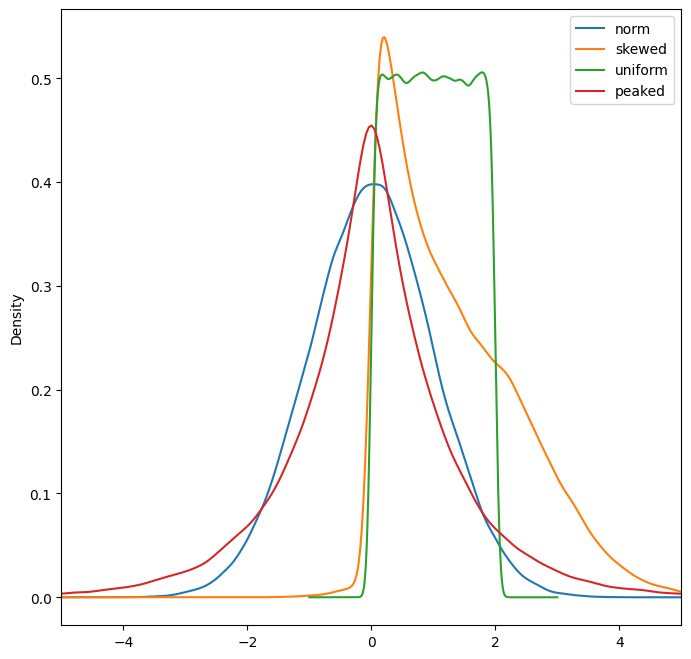

In [27]:
data_df.plot(kind = "density",
             figsize = (8,8),
             xlim = (-5,5));

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [28]:
data_df.skew()

,0
norm,-0.003968
skewed,0.990479
uniform,0.002647
peaked,0.001748


Now let's check kurtosis.

In [29]:
data_df.kurt()

,0
norm,-0.022814
skewed,1.230531
uniform,-1.200076
peaked,3.022278


As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two distributions with more data in the tails vs the center have higher kurtosis.


**Descriptive statistics** help you explore features of your data, like **center, spread and shape** by summarizing them with numerical measurements.

Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly and succinctly. In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.

# Probability Distributions

link to lesson : https://www.kaggle.com/code/hamelg/python-for-data-22-probability-distributions

**Probability** measures how likely it is for an event to occur on a scale from 0 (the event never occurs) to 1 (the event always occurs). When working with data, variables in the columns of the data set can be thought of as random variables: variables that vary due to chance. A **probability distribution** describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely.

In statistics, there are a range of precisely defined probability distributions that have different shapes and can be used to model different types of random events. In this lesson we'll discuss some common probability distributions and how to work with them in Python.

## Uniform Distribution

The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.

Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [30]:
import scipy.stats as stats

In [31]:
uniform_data = stats.uniform.rvs(size = 100000, # generate 100000 numbers
                                 loc = 0,       # from zero
                                 scale = 10)    # to 10

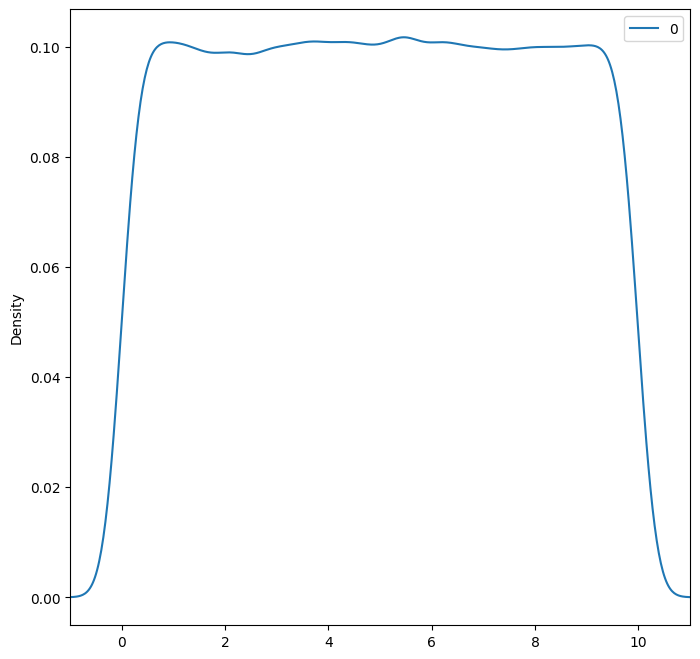

In [32]:
pd.DataFrame(uniform_data).plot(kind = "density", # plot the distribution
                                figsize = (8,8),
                                xlim = (-1,11));

**Note: the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.**

In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.

Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

- **stats.distribution.rvs()** generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).

- **stats.distribution.cdf()** is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the **cumulative distribution function**). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [33]:
stats.uniform.cdf(x = 2.5,  # cutoff value
                  loc = 0,  # distribution start
                  scale = 10) # distribution end

0.25

- **stats.distribution.ppf()** is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [34]:
stats.uniform.ppf(q = 0.4,
                  loc = 0,
                  scale = 10)

4.0

- **stats.distribution.pdf()** gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [35]:
for x in range(-1,12,3):
  print("Density at x value :" + str(x))
  print(stats.uniform.pdf(x,loc = 0,scale = 10))

Density at x value :-1
0.0
Density at x value :2
0.1
Density at x value :5
0.1
Density at x value :8
0.1
Density at x value :11
0.0


**Probability distribution functions in scipy also support median(), mean(), var() and std().**

## Generating random numbers and setting the seed

When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called "random" that lets you perform various randomization operations. Let's look at a few functions in the random library:


In [36]:
import random

random.randint(0,10)  # get a random integer in the specified range

6

In [37]:
random.choice([2,4,6,9]) # get a random element from a sequence

2

In [38]:
random.random() # get a real number b/w 0 and 1

0.2693867258756636

In [39]:
random.uniform(0,10) # get a real number in the specified range

5.670074894564186

Notice that the random library also lets you generate random uniform numbers. Regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable. For example, if you want a colleague to be able to reproduce your results exactly, you can run into problems when you use randomization. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the random seed with random.seed():

In [40]:
random.seed(12) # set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


Notice that we generated the exact same numbers with both calls to random.uniform() because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers. **This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "pseudorandom".**

Many functions in Python's libraries that use randomness have an optional random seed argument built in so that you don't have to set the seed outside of the function. For instance, the rvs() function has an optional argument random_state, that lets you set the seed.

**Note: The Python standard library "random" has a separate internal seed from the numpy library. When using functions from numpy and libraries built on top of numpy (pandas, scipy, scikit-learn) use np.random.seed() to set the seed.**

## The Normal Distribution

The **normal or Gaussian distribution** is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: **as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.**

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:

In [41]:
prob_under_minus1 = stats.norm.cdf(x = -1,
                                   loc = 0,
                                   scale = 1)
prob_over_1 = 1 - stats.norm.cdf(x = 1,
                             loc = 0,
                             scale = 1)

between_prob = 1 - (prob_under_minus1 + prob_over_1)

print(prob_under_minus1,prob_over_1,between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

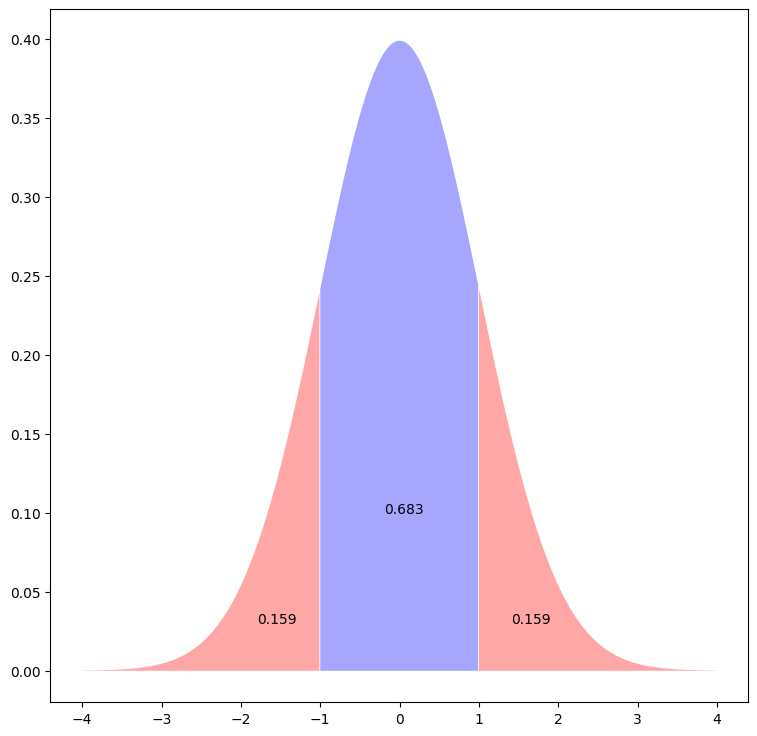

In [42]:
plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x = np.arange(-4,-1,0.01),
                 y1 = stats.norm.pdf(x = np.arange(-4,-1,0.01)),
                 facecolor = 'red',
                 alpha = 0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

Note: This lesson uses some plotting code we did not cover in the plotting lesson in order to make plots for explanatory purposes.

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean. Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [43]:
print(stats.norm.ppf(q = 0.025)) # find the quantile for the 2.5% cutoff
print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.

Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

## The Binomial Distribution

The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials.

The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.

The scipy name for the binomial is binom. Let's generate and investigate some binomial data:

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts  17  98  463  1160  2048  2467  2057  1142  445  93  10


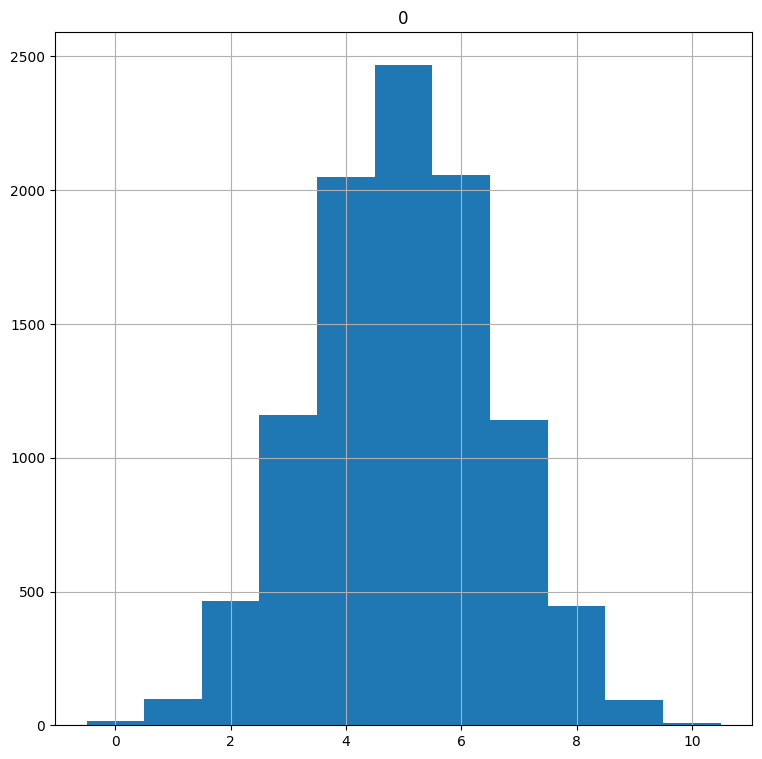

In [44]:
fair_coin_flips = stats.binom.rvs(n = 10,        # number of flips per trail
                                  p = 0.5,       # probability of success
                                  size = 10000)  # number of trials

print(pd.crosstab(index = "counts",columns = fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range = (-0.5,10.5),bins = 11);

Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   4  49  264  877  2054  2985  2696  1071


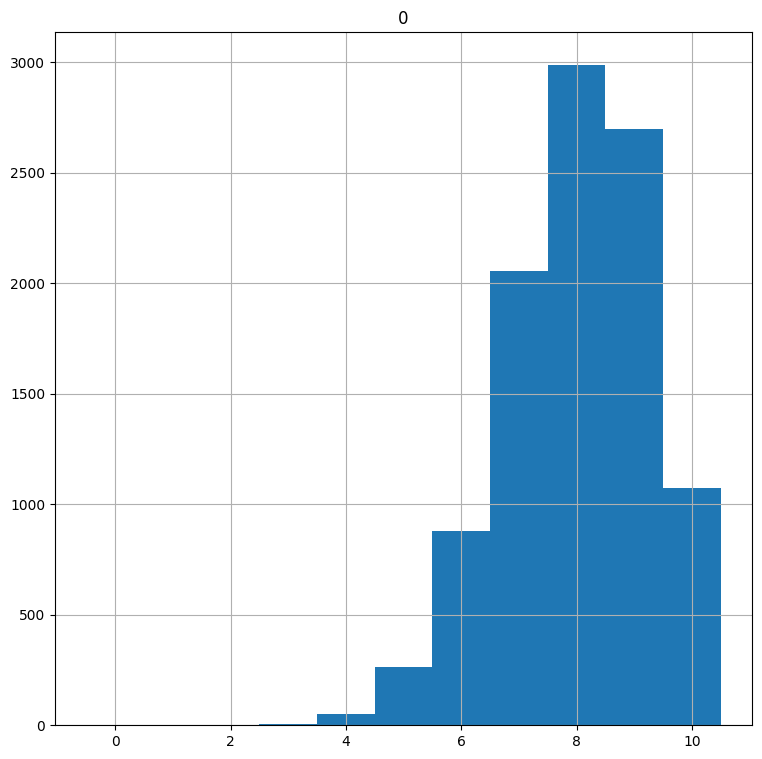

In [45]:
biased_coin_flips = stats.binom.rvs(n = 10,
                                 p = 0.8,
                                 size = 10000)

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function lets us check the probability of achieving a number of successes within a certain range:



In [46]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [47]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:

In [48]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000003

In [49]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999993

## The Geometric and Exponential Distributions

The geometric and exponential distributions model the time it takes for an event to occur.
- The **geometric distribution** is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success.
- The **exponential distribution** is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

The scipy nickname for the geometric distribution is "**geom**". Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin:



col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  15  \
row_0                                                                         
counts  4986  2502  1235  635  337  138  78  44  14  18   1   5   3   2   1   

col_0   16  
row_0       
counts   1  


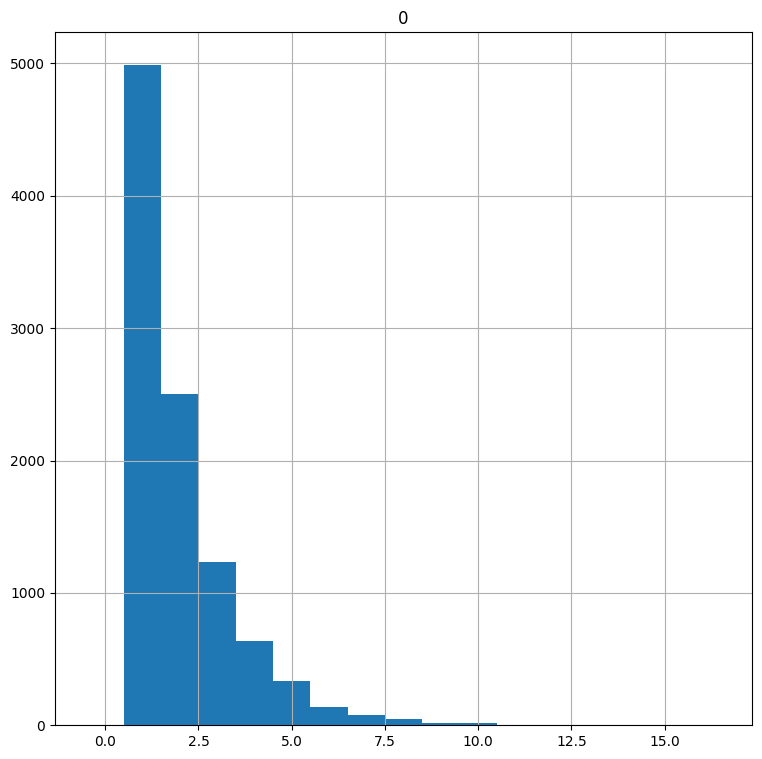

In [50]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.

Let's use cdf() to check the probability of needing 6 flips or more to get a success:

In [51]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five


0.03125

Use pmf() to check the probability of seeing a specific number of flips before a successes:

In [52]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

The scipy name for the exponential distribution is "expon". Let's investigate the exponential distribution:

In [53]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

Note: The average arrival time for the exponential distribution is equal to 1/arrival_rate.

Let's plot this exponential distribution to get an idea of its shape:

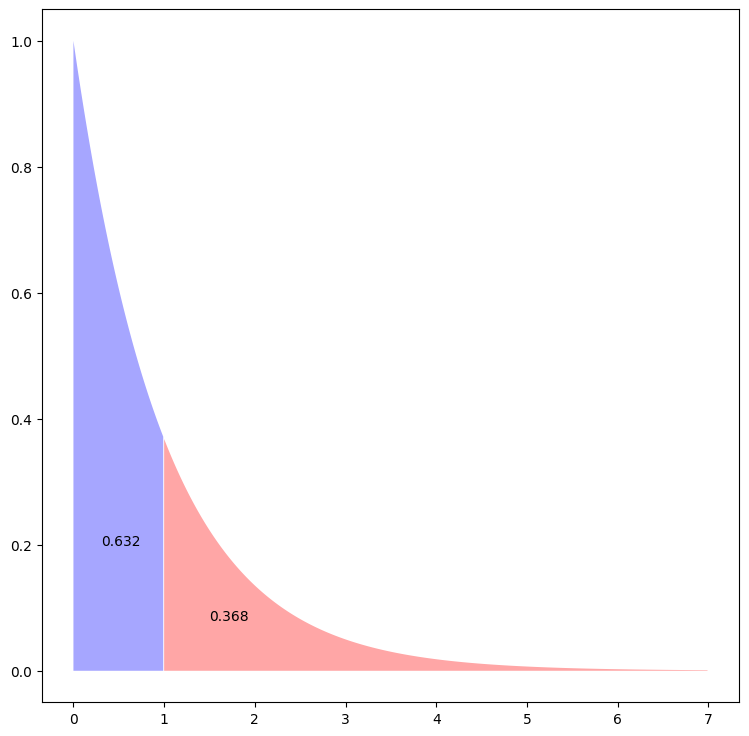

In [54]:
plt.fill_between(x=np.arange(0,1,0.01),
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01),
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.

## The Poisson Distribution

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. **The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.**

The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3749  3578  1867  615  149  35  6  1


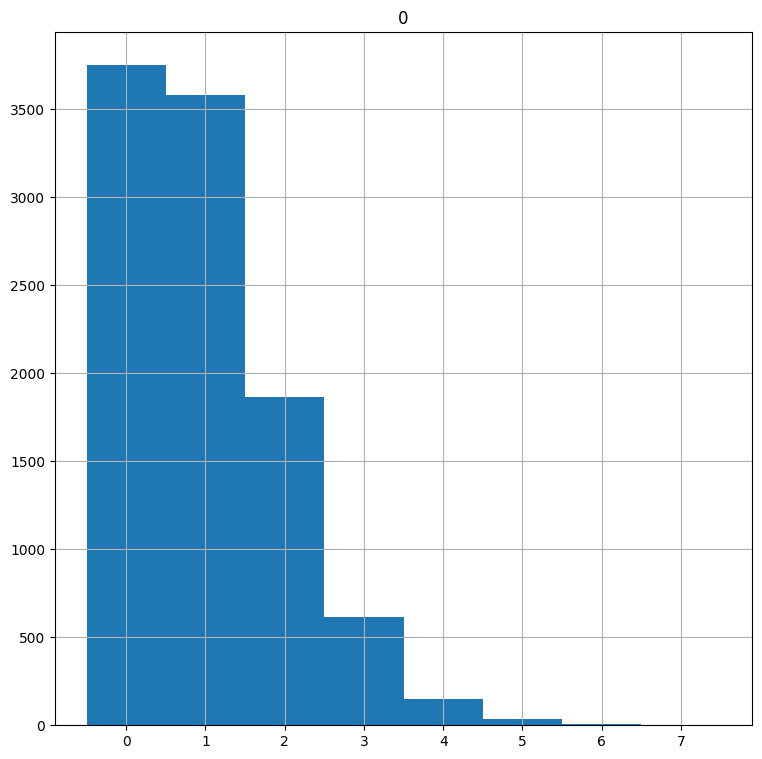

In [55]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   0   1   2   3    4    5    6    7     8     9   ...   15   16   17  \
row_0                                                   ...                  
counts   2   4  18  73  176  342  614  909  1111  1292  ...  349  226  138   

col_0   18  19  20  21  22  23  25  
row_0                               
counts  67  32  22   7   5   2   1  

[1 rows x 25 columns]


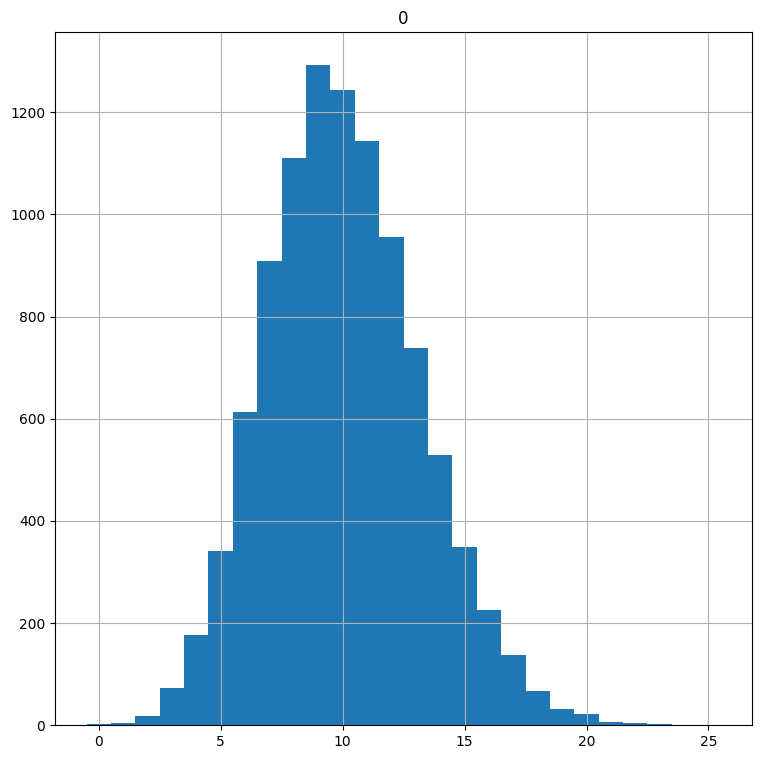

In [56]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:

In [57]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [58]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including many that we did not discuss in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.

# Confidence Intervals

link to lesson: https://www.kaggle.com/code/hamelg/python-for-data-23-confidence-intervals

To this point, this guide has focused on the functions and syntax necessary to manipulate, explore and describe data. **Data cleaning and exploratory analysis are often preliminary steps toward the end goal of extracting insight from data through statistical inference or predictive modeling.** The remainder of this guide will focus on methods for analyzing data and tools for carrying out analyses in Python.

**Statistical inference** is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples.

In data analysis, we are often interested in the characteristics of some large population, but collecting data on the entire population may be infeasible. For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible. Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.

## Point Estimates

**Point estimates** are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. **The average of a sample is known as the sample mean.**

**The sample mean is usually not exactly the same as the population mean.** This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [59]:
import math

In [60]:
np.random.seed(10)

population_ages1 = stats.poisson.rvs(loc=18, mu=35,size = 150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [61]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 1000 values

print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means


42.388


0.614372000000003

Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

**Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup.** For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample:

In [62]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) + (["hispanic"]*50000) + (["asian"]*25000) + (["other"]*25000)

demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )

other proportion estimate:
0.099
white proportion estimate:
0.379
asian proportion estimate:
0.099
black proportion estimate:
0.231
hispanic proportion estimate:
0.192


**Notice that the proportion estimates are close to the true underlying population proportions.**

# Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking the skew:

-0.12008483603917186


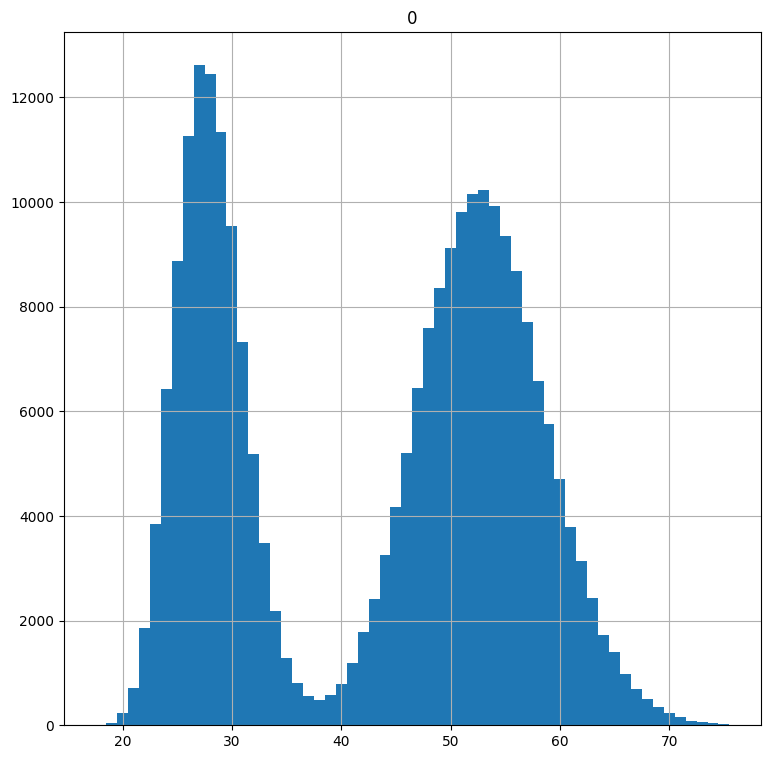

In [63]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages) );

The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew:

-0.056225282585406065


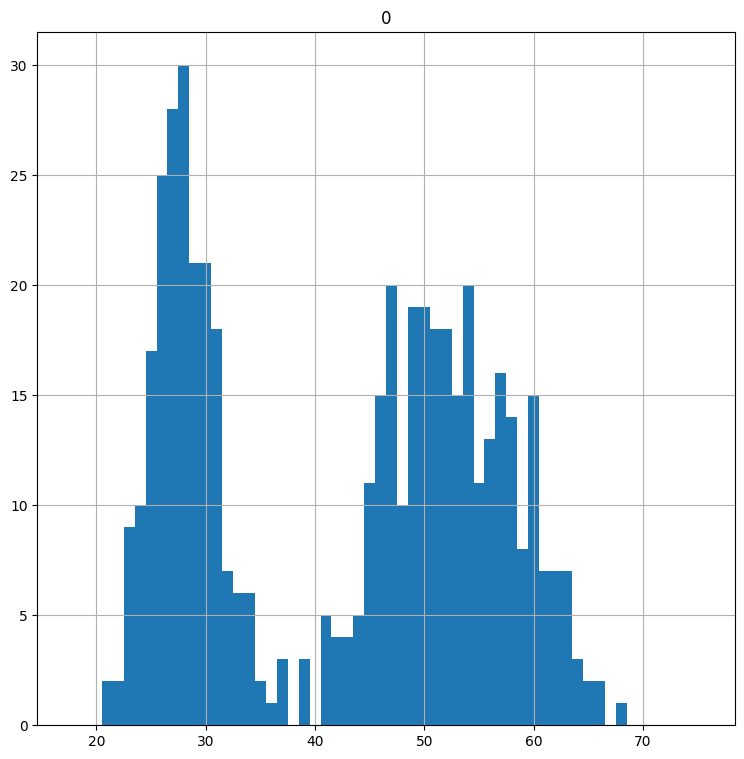

In [64]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9));

print( stats.skew(sample_ages) )

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.

The **central limit theorem** is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis.

***"At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution."***

To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

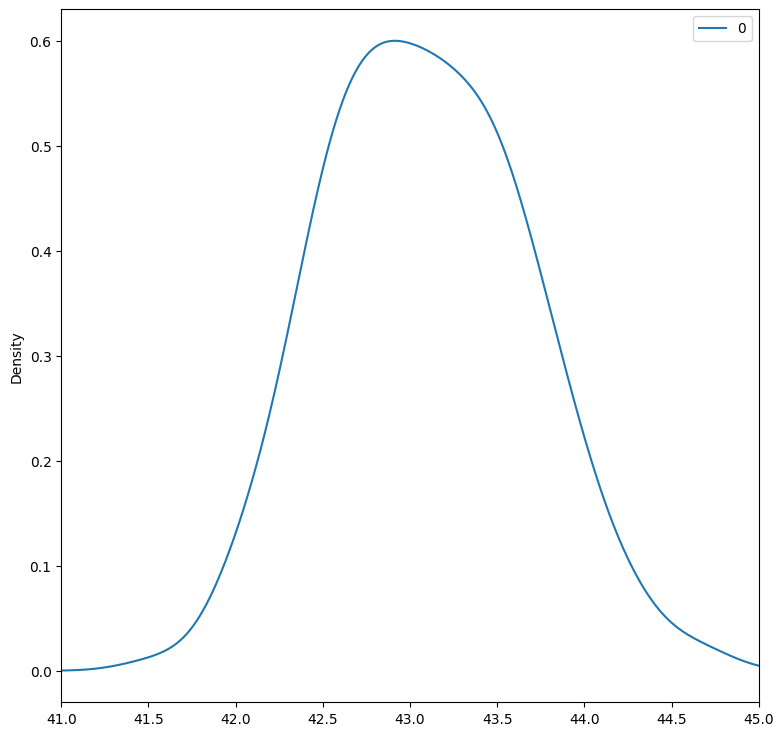

In [65]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )

pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45));

**The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:**

In [66]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

The more samples we take, the better our estimate of the population parameter is likely to be.

## Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

If you know the standard deviation of the population, the margin of error is equal to:

$$z* \dfrac{σ}{\sqrt{n}} $$

Where **σ (sigma)** is the population standard deviation, n is sample size, and z is a number known as the **z-critical value**. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).

Let's calculate a 95% confidence for our mean point estimate:

In [67]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a = population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975) # get the z-critical value

print("z-critical value:")
print(z_critical)

pop_std_dev = population_ages.std() # get the population standard deviation

margin_of_error = z_critical * (pop_std_dev / math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


*Note: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails.*

Notice that the confidence interval we calculated captures the true population mean of 43.0023.

Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [68]:
np.random.seed(10)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a = population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975) # get the z-critical value

    pop_std_dev = population_ages.std() # get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_std_dev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)

    intervals.append(confidence_interval)


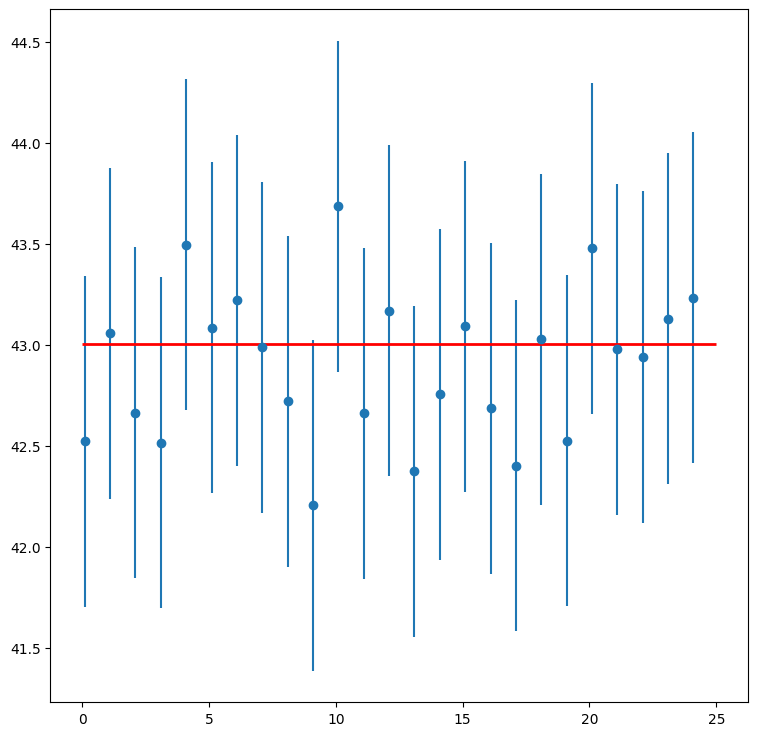

In [72]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means,
             yerr=[np.abs((top-bot))/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023,
           linewidth=2.0,
           color="red");

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf().

Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

In [73]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


Note: when using the t-distribution, you have to supply the degrees of freedom (df). For this type of test, the degrees of freedom is equal to the sample size minus 1. If you have a large sample size, the t-distribution approaches the normal distribution.

Notice that the t-critical value is larger than the z-critical value we used for 95% confidence interval. This allows the confidence interval to cast a larger net to make up for the variability caused by using the sample standard deviation in place of the population standard deviation. The end result is a much wider confidence interval (an interval with a larger margin of error.).

If you have a large sample, the t-critical value will approach the z-critical value so there is little difference between using the normal distribution vs. the t-distribution:

In [74]:
# Check the difference between critical values with a sample size of 1000

stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)

0.0023774765933946007

Instead of calculating a confidence interval for a mean point estimate by hand, you can calculate it using the Python function stats.t.interval():

In [76]:
stats.t.interval(confidence = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.65147508161371, 48.108524918386294)

We can also make a confidence interval for a point estimate of a population proportion. In this case, the margin of error equals:

$$z* \sqrt{\frac{p(1-p)}{n}}$$

Where z is the z-critical value for our confidence level, p is the point estimate of the population proportion and n is the sample size. Let's calculate a 95% confidence interval for Hispanics according to the sample proportion we calculated earlier (0.192):

In [77]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error)

confidence_interval

(0.16758794241348748, 0.21641205758651252)

The output shows that the confidence interval captured the true population parameter of 0.2. Similar to our population mean point estimates, we can use the scipy stats.distribution.interval() function to calculate a confidence interval for a population proportion for us. In this case were working with z-critical values so we want to work with the normal distribution instead of the t distribution:

In [79]:
stats.norm.interval(confidence = 0.95,    # Confidence level
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)

Estimating population parameters through sampling is a simple, yet powerful form of inference. Point estimates combined with error margins let us create confidence intervals that capture the true population parameter with high probability.

Next time we'll expand on the concepts in this lesson by learning about statistical hypothesis testing.